<a href="https://colab.research.google.com/github/SoundaryaDube/Predictive-Analysis/blob/main/HealthHack_Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
import os

In [3]:
# Path to the ZIP file
zip_path = "/content/drive/MyDrive/B. Disease Grading.zip"

# Open the ZIP file and list its contents
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files inside ZIP:", z.namelist())  # List all files inside ZIP

Files inside ZIP: ['B. Disease Grading/', 'B. Disease Grading/1. Original Images/', 'B. Disease Grading/1. Original Images/a. Training Set/', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_003.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_004.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_005.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_006.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_007.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_008.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_009.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_010.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_011.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_012.jpg', 'B. Di

In [4]:
with zipfile.ZipFile(zip_path, 'r') as z:
    file_name = z.namelist()[0]  # Change index if needed
    with z.open(file_name) as f:
        content = f.read()
        print("File content preview:", content[:500])  # Preview first 500 bytes

File content preview: b''


In [5]:
with zipfile.ZipFile(zip_path, 'r') as z:
    file_list = z.namelist()
    print("Files inside ZIP:", file_list)

    # Check file sizes
    for file in file_list:
        with z.open(file) as f:
            content = f.read()
            print(f"{file} - Size: {len(content)} bytes")

Files inside ZIP: ['B. Disease Grading/', 'B. Disease Grading/1. Original Images/', 'B. Disease Grading/1. Original Images/a. Training Set/', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_003.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_004.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_005.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_006.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_007.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_008.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_009.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_010.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_011.jpg', 'B. Disease Grading/1. Original Images/a. Training Set/IDRiD_012.jpg', 'B. Di

In [6]:
!unzip '/content/drive/MyDrive/B. Disease Grading.zip' -d '/content/extracted'

Archive:  /content/drive/MyDrive/B. Disease Grading.zip
   creating: /content/extracted/B. Disease Grading/
   creating: /content/extracted/B. Disease Grading/1. Original Images/
   creating: /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/
 extracting: /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_001.jpg  
 extracting: /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_002.jpg  
 extracting: /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_003.jpg  
 extracting: /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_004.jpg  
 extracting: /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_005.jpg  
 extracting: /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_006.jpg  
 extracting: /content/extracted/B. Disease Grading/1. Original Images/a. Training Set/IDRiD_007.jpg  
 extracting: /conten

In [8]:
# Define image size & batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define dataset path
train_dir = '/content/extracted/B. Disease Grading/1. Original Images/a. Training Set'
valid_dir = '/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set'  # If validation images exist

In [9]:
print(os.listdir(train_dir))

['IDRiD_344.jpg', 'IDRiD_149.jpg', 'IDRiD_079.jpg', 'IDRiD_006.jpg', 'IDRiD_150.jpg', 'IDRiD_283.jpg', 'IDRiD_122.jpg', 'IDRiD_248.jpg', 'IDRiD_067.jpg', 'IDRiD_099.jpg', 'IDRiD_389.jpg', 'IDRiD_211.jpg', 'IDRiD_120.jpg', 'IDRiD_396.jpg', 'IDRiD_089.jpg', 'IDRiD_347.jpg', 'IDRiD_102.jpg', 'IDRiD_327.jpg', 'IDRiD_105.jpg', 'IDRiD_104.jpg', 'IDRiD_194.jpg', 'IDRiD_357.jpg', 'IDRiD_239.jpg', 'IDRiD_190.jpg', 'IDRiD_195.jpg', 'IDRiD_192.jpg', 'IDRiD_296.jpg', 'IDRiD_241.jpg', 'IDRiD_345.jpg', 'IDRiD_197.jpg', 'IDRiD_339.jpg', 'IDRiD_303.jpg', 'IDRiD_235.jpg', 'IDRiD_200.jpg', 'IDRiD_219.jpg', 'IDRiD_087.jpg', 'IDRiD_234.jpg', 'IDRiD_355.jpg', 'IDRiD_321.jpg', 'IDRiD_253.jpg', 'IDRiD_193.jpg', 'IDRiD_246.jpg', 'IDRiD_405.jpg', 'IDRiD_071.jpg', 'IDRiD_272.jpg', 'IDRiD_196.jpg', 'IDRiD_137.jpg', 'IDRiD_179.jpg', 'IDRiD_110.jpg', 'IDRiD_315.jpg', 'IDRiD_214.jpg', 'IDRiD_384.jpg', 'IDRiD_271.jpg', 'IDRiD_285.jpg', 'IDRiD_277.jpg', 'IDRiD_154.jpg', 'IDRiD_273.jpg', 'IDRiD_010.jpg', 'IDRiD_153.jp

In [10]:
# Define the model architecture
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [11]:
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs)
x = Flatten()(x)

In [12]:
# Model Architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for disease grading
])

In [13]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
os.listdir('/content/extracted/B. Disease Grading/1. Original Images/a. Training Set')  # Check contents of the training folder
os.listdir('/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set')  # Check contents of the validation folder

['IDRiD_079.jpg',
 'IDRiD_006.jpg',
 'IDRiD_067.jpg',
 'IDRiD_099.jpg',
 'IDRiD_089.jpg',
 'IDRiD_102.jpg',
 'IDRiD_087.jpg',
 'IDRiD_071.jpg',
 'IDRiD_010.jpg',
 'IDRiD_091.jpg',
 'IDRiD_011.jpg',
 'IDRiD_015.jpg',
 'IDRiD_065.jpg',
 'IDRiD_021.jpg',
 'IDRiD_002.jpg',
 'IDRiD_004.jpg',
 'IDRiD_026.jpg',
 'IDRiD_022.jpg',
 'IDRiD_048.jpg',
 'IDRiD_070.jpg',
 'IDRiD_017.jpg',
 'IDRiD_018.jpg',
 'IDRiD_078.jpg',
 'IDRiD_001.jpg',
 'IDRiD_053.jpg',
 'IDRiD_040.jpg',
 'IDRiD_014.jpg',
 'IDRiD_057.jpg',
 'IDRiD_019.jpg',
 'IDRiD_075.jpg',
 'IDRiD_038.jpg',
 'IDRiD_093.jpg',
 'IDRiD_016.jpg',
 'IDRiD_058.jpg',
 'IDRiD_068.jpg',
 'IDRiD_088.jpg',
 'IDRiD_063.jpg',
 'IDRiD_101.jpg',
 'IDRiD_069.jpg',
 'IDRiD_025.jpg',
 'IDRiD_084.jpg',
 'IDRiD_034.jpg',
 'IDRiD_033.jpg',
 'IDRiD_009.jpg',
 'IDRiD_020.jpg',
 'IDRiD_086.jpg',
 'IDRiD_052.jpg',
 'IDRiD_095.jpg',
 'IDRiD_024.jpg',
 'IDRiD_043.jpg',
 'IDRiD_055.jpg',
 'IDRiD_046.jpg',
 'IDRiD_083.jpg',
 'IDRiD_054.jpg',
 'IDRiD_098.jpg',
 'IDRiD_05

In [27]:
# List the files in the training directory
train_files = os.listdir('/content/extracted/B. Disease Grading/1. Original Images/a. Training Set')
valid_files = os.listdir('/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set')

print("Training files:", train_files)
print("Validation files:", valid_files)

Training files: ['IDRiD_344.jpg', 'IDRiD_149.jpg', 'IDRiD_079.jpg', 'IDRiD_006.jpg', 'IDRiD_150.jpg', 'IDRiD_283.jpg', 'IDRiD_122.jpg', 'IDRiD_248.jpg', 'IDRiD_067.jpg', 'IDRiD_099.jpg', 'IDRiD_389.jpg', 'IDRiD_211.jpg', 'IDRiD_120.jpg', 'IDRiD_396.jpg', 'IDRiD_089.jpg', 'IDRiD_347.jpg', 'IDRiD_102.jpg', 'IDRiD_327.jpg', 'IDRiD_105.jpg', 'IDRiD_104.jpg', 'IDRiD_194.jpg', 'IDRiD_357.jpg', 'IDRiD_239.jpg', 'IDRiD_190.jpg', 'IDRiD_195.jpg', 'IDRiD_192.jpg', 'IDRiD_296.jpg', 'IDRiD_241.jpg', 'IDRiD_345.jpg', 'IDRiD_197.jpg', 'IDRiD_339.jpg', 'IDRiD_303.jpg', 'IDRiD_235.jpg', 'IDRiD_200.jpg', 'IDRiD_219.jpg', 'IDRiD_087.jpg', 'IDRiD_234.jpg', 'IDRiD_355.jpg', 'IDRiD_321.jpg', 'IDRiD_253.jpg', 'IDRiD_193.jpg', 'IDRiD_246.jpg', 'IDRiD_405.jpg', 'IDRiD_071.jpg', 'IDRiD_272.jpg', 'IDRiD_196.jpg', 'IDRiD_137.jpg', 'IDRiD_179.jpg', 'IDRiD_110.jpg', 'IDRiD_315.jpg', 'IDRiD_214.jpg', 'IDRiD_384.jpg', 'IDRiD_271.jpg', 'IDRiD_285.jpg', 'IDRiD_277.jpg', 'IDRiD_154.jpg', 'IDRiD_273.jpg', 'IDRiD_010.jpg

In [99]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define image paths and labels
train_dir = '/content/extracted/B. Disease Grading/1. Original Images/a. Training Set'
valid_dir = '/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set'

train_files = os.listdir(train_dir)
valid_files = os.listdir(valid_dir)

# list of image paths (use actual paths and labels)
train_image_paths = [os.path.join(train_dir, file) for file in train_files]
valid_image_paths = [os.path.join(valid_dir, file) for file in valid_files]

# Assuming labels are predefined or extracted (e.g., 0, 1, 2 for classes)
train_labels = [np.random.randint(0, 5) for _ in range(len(train_image_paths))]
valid_labels = [np.random.randint(0, 5) for _ in range(len(valid_image_paths))]

df_train = pd.DataFrame({'file': train_image_paths, 'label': [str(label) for label in train_labels]})
df_valid = pd.DataFrame({'file': valid_image_paths, 'label': [str(label) for label in valid_labels]})


In [106]:
import tensorflow as tf
import os

# Paths to the dataset
train_dir = '/content/extracted/B. Disease Grading/1. Original Images/a. Training Set'
valid_dir = '/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set'

def load_image(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize
    return image

def create_dataset(data_dir):
    file_paths = [os.path.join(data_dir, fname) for fname in os.listdir(data_dir)]
    train_labels = [np.random.randint(0, 5) for _ in range(len(train_image_paths))]
    valid_labels = [np.random.randint(0, 5) for _ in range(len(valid_image_paths))]
    path_ds = tf.data.Dataset.from_tensor_slices(file_paths)
    image_ds = path_ds.map(load_image)
    train_labels_ds = tf.data.Dataset.from_tensor_slices(train_labels)
    valid_labels_ds = tf.data.Dataset.from_tensor_slices(valid_labels)
    return tf.data.Dataset.zip((image_ds, train_labels_ds, valid_labels_ds))

train_data = create_dataset(train_dir)
valid_data = create_dataset(valid_dir)

# Set batch size
train_data = train_data.batch(32)
valid_data = valid_data.batch(32)


In [113]:
# Ensure categorical labels are correctly handled by `flow_from_dataframe`
train_data = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=None,
    x_col='file',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Automatically handles one-hot encoding
)

valid_data = valid_datagen.flow_from_dataframe(
    dataframe=df_valid,
    directory=None,
    x_col='file',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Automatically handles one-hot encoding
)


Found 413 validated image filenames belonging to 5 classes.
Found 103 validated image filenames belonging to 5 classes.


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(128, activation='relu'),
    Dropout(0.5),  # Another Dropout layer
    Dense(5, activation='softmax')  # Assuming 5 classes for disease grading
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
model.fit(train_data, epochs=10, validation_data=valid_data,
          steps_per_epoch=len(train_data), validation_steps=len(valid_data),
          callbacks=[early_stopping])


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 144s 7s/step - accuracy: 0.2306 - loss: 4.7255 - val_accuracy: 0.3010 - val_loss: 2.1803
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 93s 7s/step - accuracy: 0.2205 - loss: 1.6472 - val_accuracy: 0.3010 - val_loss: 1.6685
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 148s 8s/step - accuracy: 0.1878 - loss: 1.6161 - val_accuracy: 0.3010 - val_loss: 1.7505
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 134s 7s/step - accuracy: 0.2280 - loss: 1.5971 - val_accuracy: 0.3010 - val_loss: 1.7128
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 93s 7s/step - accuracy: 0.2563 - loss: 1.6152 - val_accuracy: 0.3010 - val_loss: 1.6028
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - accuracy: 0.2297 - loss: 1.6044 - val_accuracy: 0.3010 - val_loss: 1.6049
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 145s 7s/step - accuracy: 0.2393 - loss: 1.6099 - val_accuracy: 0.2136 - val_loss: 1.6281
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 147s 7s/step - accuracy: 0.2486 - loss: 1.6176 - val_accuracy: 0.2136 - val_

In [115]:
# Evaluate model on the validation dataset
val_loss, val_accuracy = model.evaluate(valid_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3298 - loss: 1.5967
Validation Loss: 1.6021021604537964
Validation Accuracy: 0.3009708821773529


In [116]:
# Save Model
model.save("diabetic_retinopathy_model.h5")

In [118]:
history = model.fit(train_data, epochs=10, validation_data=valid_data,
                    steps_per_epoch=len(train_data), validation_steps=len(valid_data))


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 91s 7s/step - accuracy: 0.2255 - loss: 1.6157 - val_accuracy: 0.3010 - val_loss: 1.6046
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.2502 - loss: 1.6043 - val_accuracy: 0.2524 - val_loss: 1.6060
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - accuracy: 0.2416 - loss: 1.6041 - val_accuracy: 0.1942 - val_loss: 1.6070
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.2534 - loss: 1.5989 - val_accuracy: 0.2136 - val_loss: 1.6066
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 93s 7s/step - accuracy: 0.2125 - loss: 1.6049 - val_accuracy: 0.2136 - val_loss: 1.6069
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.2319 - loss: 1.6066 - val_accuracy: 0.2136 - val_loss: 1.6069
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.2657 - loss: 1.6020 - val_accuracy: 0.2136 - val_loss: 1.6068
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 96s 7s/step - accuracy: 0.2517 - loss: 1.6157 - val_accuracy: 0.2136 - val_los

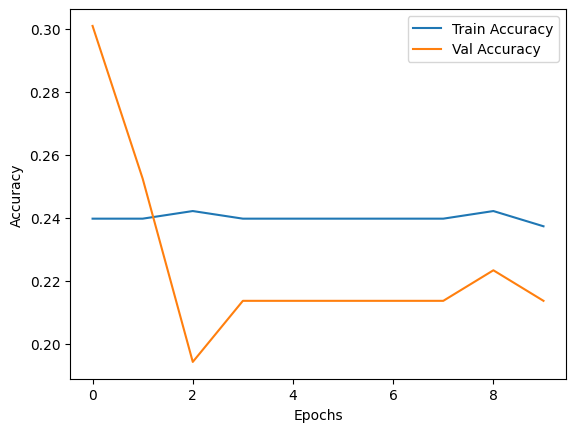

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
import tensorflow as tf

# Load and preprocess the image
image_path = '/content/extracted/B. Disease Grading/1. Original Images/b. Testing Set/IDRiD_086.jpg'  # Assuming the image is in the current directory
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))  # Resize to match model input
image = tf.keras.preprocessing.image.img_to_array(image)
image = tf.expand_dims(image, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(image)

# Display the prediction
print(predictions)  # Output raw predictions

# If your model is for classification, you can get the class label
predicted_class = tf.argmax(predictions, axis=1).numpy()  # Get the predicted class index
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[0.20404434 0.18426737 0.21512538 0.19240429 0.20415853]]
Predicted Class: [2]
